<a href="https://colab.research.google.com/github/Deepika-rajput/robusttraffic_detection/blob/main/blurrydetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
import os
for dirname, _, filenames in os.walk('/content/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/dataset/valid.p
/content/dataset/test.p
/content/dataset/train.p


In [ ]:
with open(r"/content/dataset/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)

with open(r"/content/dataset/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)

with open(r"/content/dataset/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
X_train, y_train= train['features'], train['labels']#unpacking the data
X_validation, y_validation= valid['features'], valid['labels']
X_test, y_test= test['features'], test['labels']

In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape

(34799,)

4

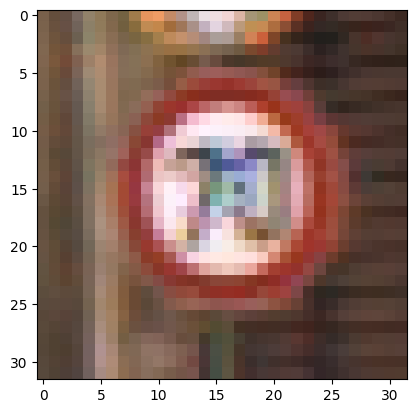

In [ ]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

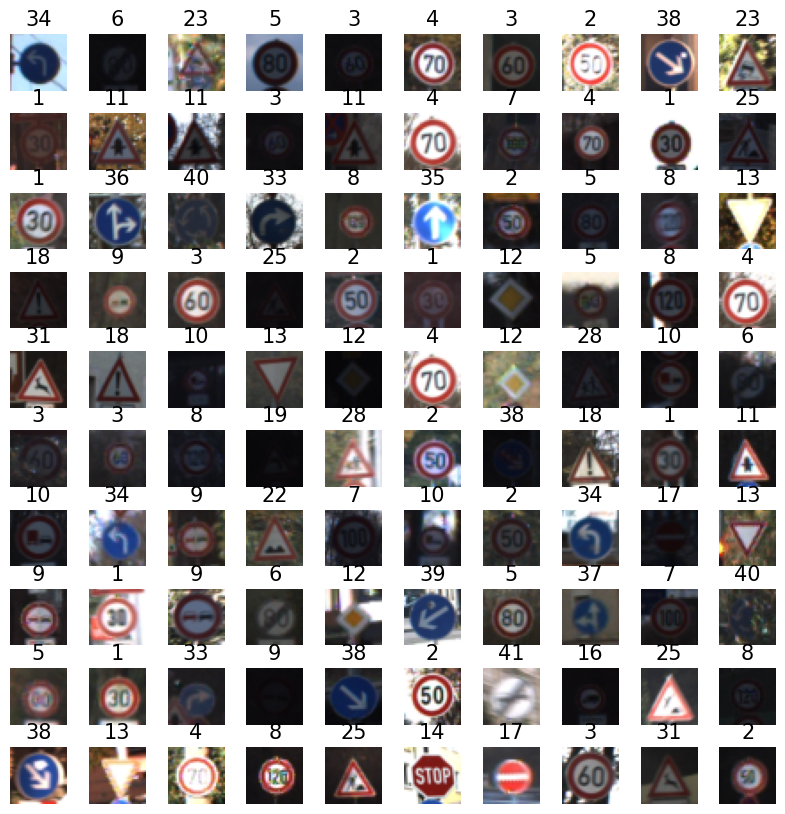

In [ ]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array(2D to 1D array)

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables
for i in np.arange(0, W_grid*L_grid):
    # Select a random number
    index=np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize=15)
    axes[i].axis("off")

plt.subplots_adjust(hspace=0.4)#so their is no overlapping in output


In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
X_train_gray=np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray=np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray=np.sum(X_validation/3, axis=3, keepdims=True)

In [ ]:
X_train_gray.shape

(34799, 32, 32, 1)

In [ ]:
X_train_gray_norm=(X_train_gray-128)/128 #normalizing the grayscale image
X_test_gray_norm=(X_test_gray-128)/128
X_validation_gray_norm=(X_validation_gray-128)/128

NameError: name 'X_train_gray' is not defined

In [ ]:
X_train_gray_norm

array([[[[-0.88802083],
         [-0.88020833],
         [-0.87760417],
         ...,
         [-0.86979167],
         [-0.87760417],
         [-0.88020833]],

        [[-0.88020833],
         [-0.87760417],
         [-0.875     ],
         ...,
         [-0.86979167],
         [-0.87760417],
         [-0.88020833]],

        [[-0.8828125 ],
         [-0.88020833],
         [-0.87239583],
         ...,
         [-0.85416667],
         [-0.86197917],
         [-0.86979167]],

        ...,

        [[-0.90364583],
         [-0.90625   ],
         [-0.90625   ],
         ...,
         [-0.88020833],
         [-0.88541667],
         [-0.88541667]],

        [[-0.89583333],
         [-0.90364583],
         [-0.8984375 ],
         ...,
         [-0.890625  ],
         [-0.88541667],
         [-0.88541667]],

        [[-0.90364583],
         [-0.89583333],
         [-0.90364583],
         ...,
         [-0.90104167],
         [-0.890625  ],
         [-0.89583333]]],


       [[[ 0.46354167],


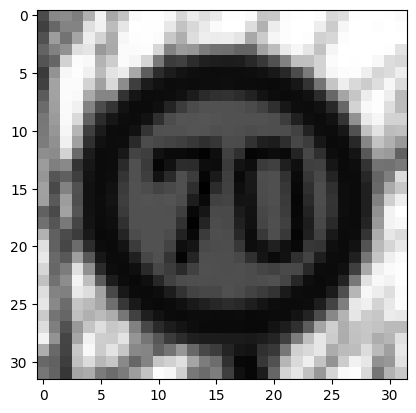

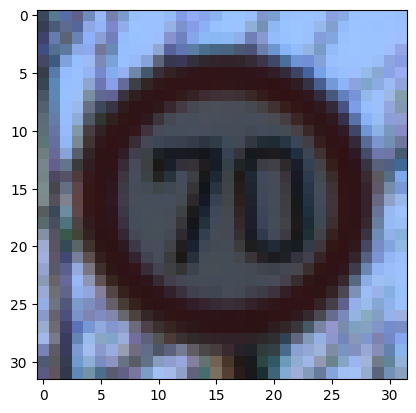

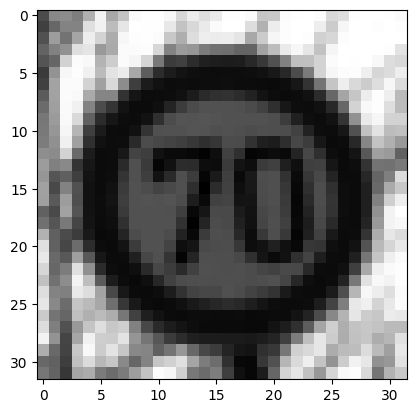

In [ ]:
i = random.randint(1, len(X_train_gray))#displaying grayscale,color,normalized grayscale
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [ ]:
from tensorflow.keras import layers, models

# Define the model
CNN = models.Sequential()

# Add layers
CNN.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 1)))#convolutional layer
CNN.add(layers.AveragePooling2D(pool_size=(2, 2)))  # Specify pool_size

CNN.add(layers.Dropout(0.2))#regularization technique
CNN.add(layers.Conv2D(16, (5, 5), activation='relu'))#2nd convolutional layer
CNN.add(layers.AveragePooling2D(pool_size=(2, 2)))#second pooling layer

# Flatten and dense layers
CNN.add(layers.Flatten())#fully connected layers
CNN.add(layers.Dense(120, activation='relu'))#relu=reduce no-linearity
CNN.add(layers.Dense(84, activation='relu'))
CNN.add(layers.Dense(10, activation='softmax'))#softmax=converts raw output into probabilities(as its a multiclass classification)

# Summary of the model
CNN.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
CNN.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.layers import Dense

# Remove the last layer and add the correct output layer
CNN.pop()
CNN.add(Dense(43, activation='softmax'))  # 43 output units, softmax activation for multi-class classification

# Compile the model
CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Convert labels to integer type (ensure correct dtype)
y_train = y_train.astype('int32')
y_validation = y_validation.astype('int32')

# Train the model
history = CNN.fit(
    X_train_gray_norm, y_train, batch_size=32, epochs=1, verbose=1,
    validation_data=(X_validation_gray_norm, y_validation)
)





1088/1088 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 0.3995 - loss: 2.2111 - val_accuracy: 0.8136 - val_loss: 0.6313


In [ ]:
score = CNN.evaluate(X_test_gray_norm, y_test)#accuracy of our cnn model
print('Test Accuracy: {}'.format(score[1]))

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8065 - loss: 0.7655
Test Accuracy: 0.8063341379165649


In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

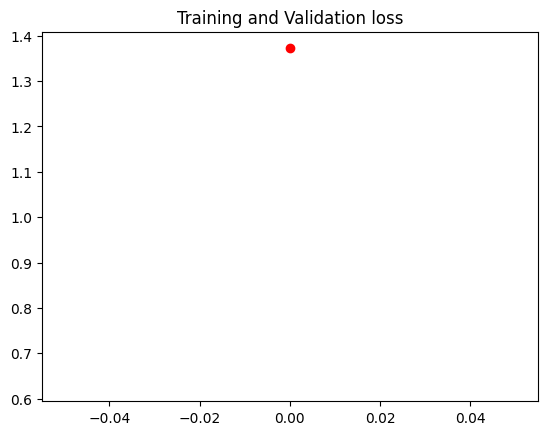

In [ ]:
epochs=range(len(accuracy))
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation Accuracy')

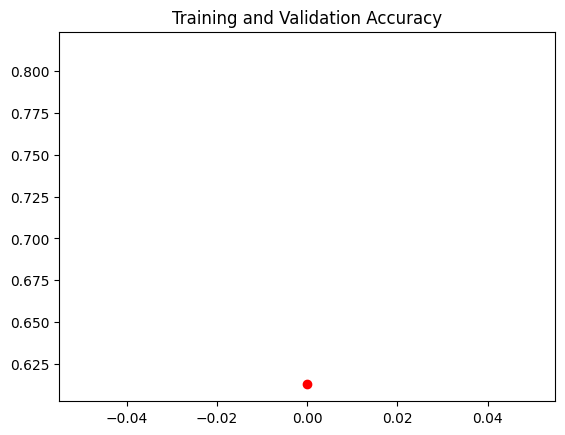

In [ ]:
epochs=range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step


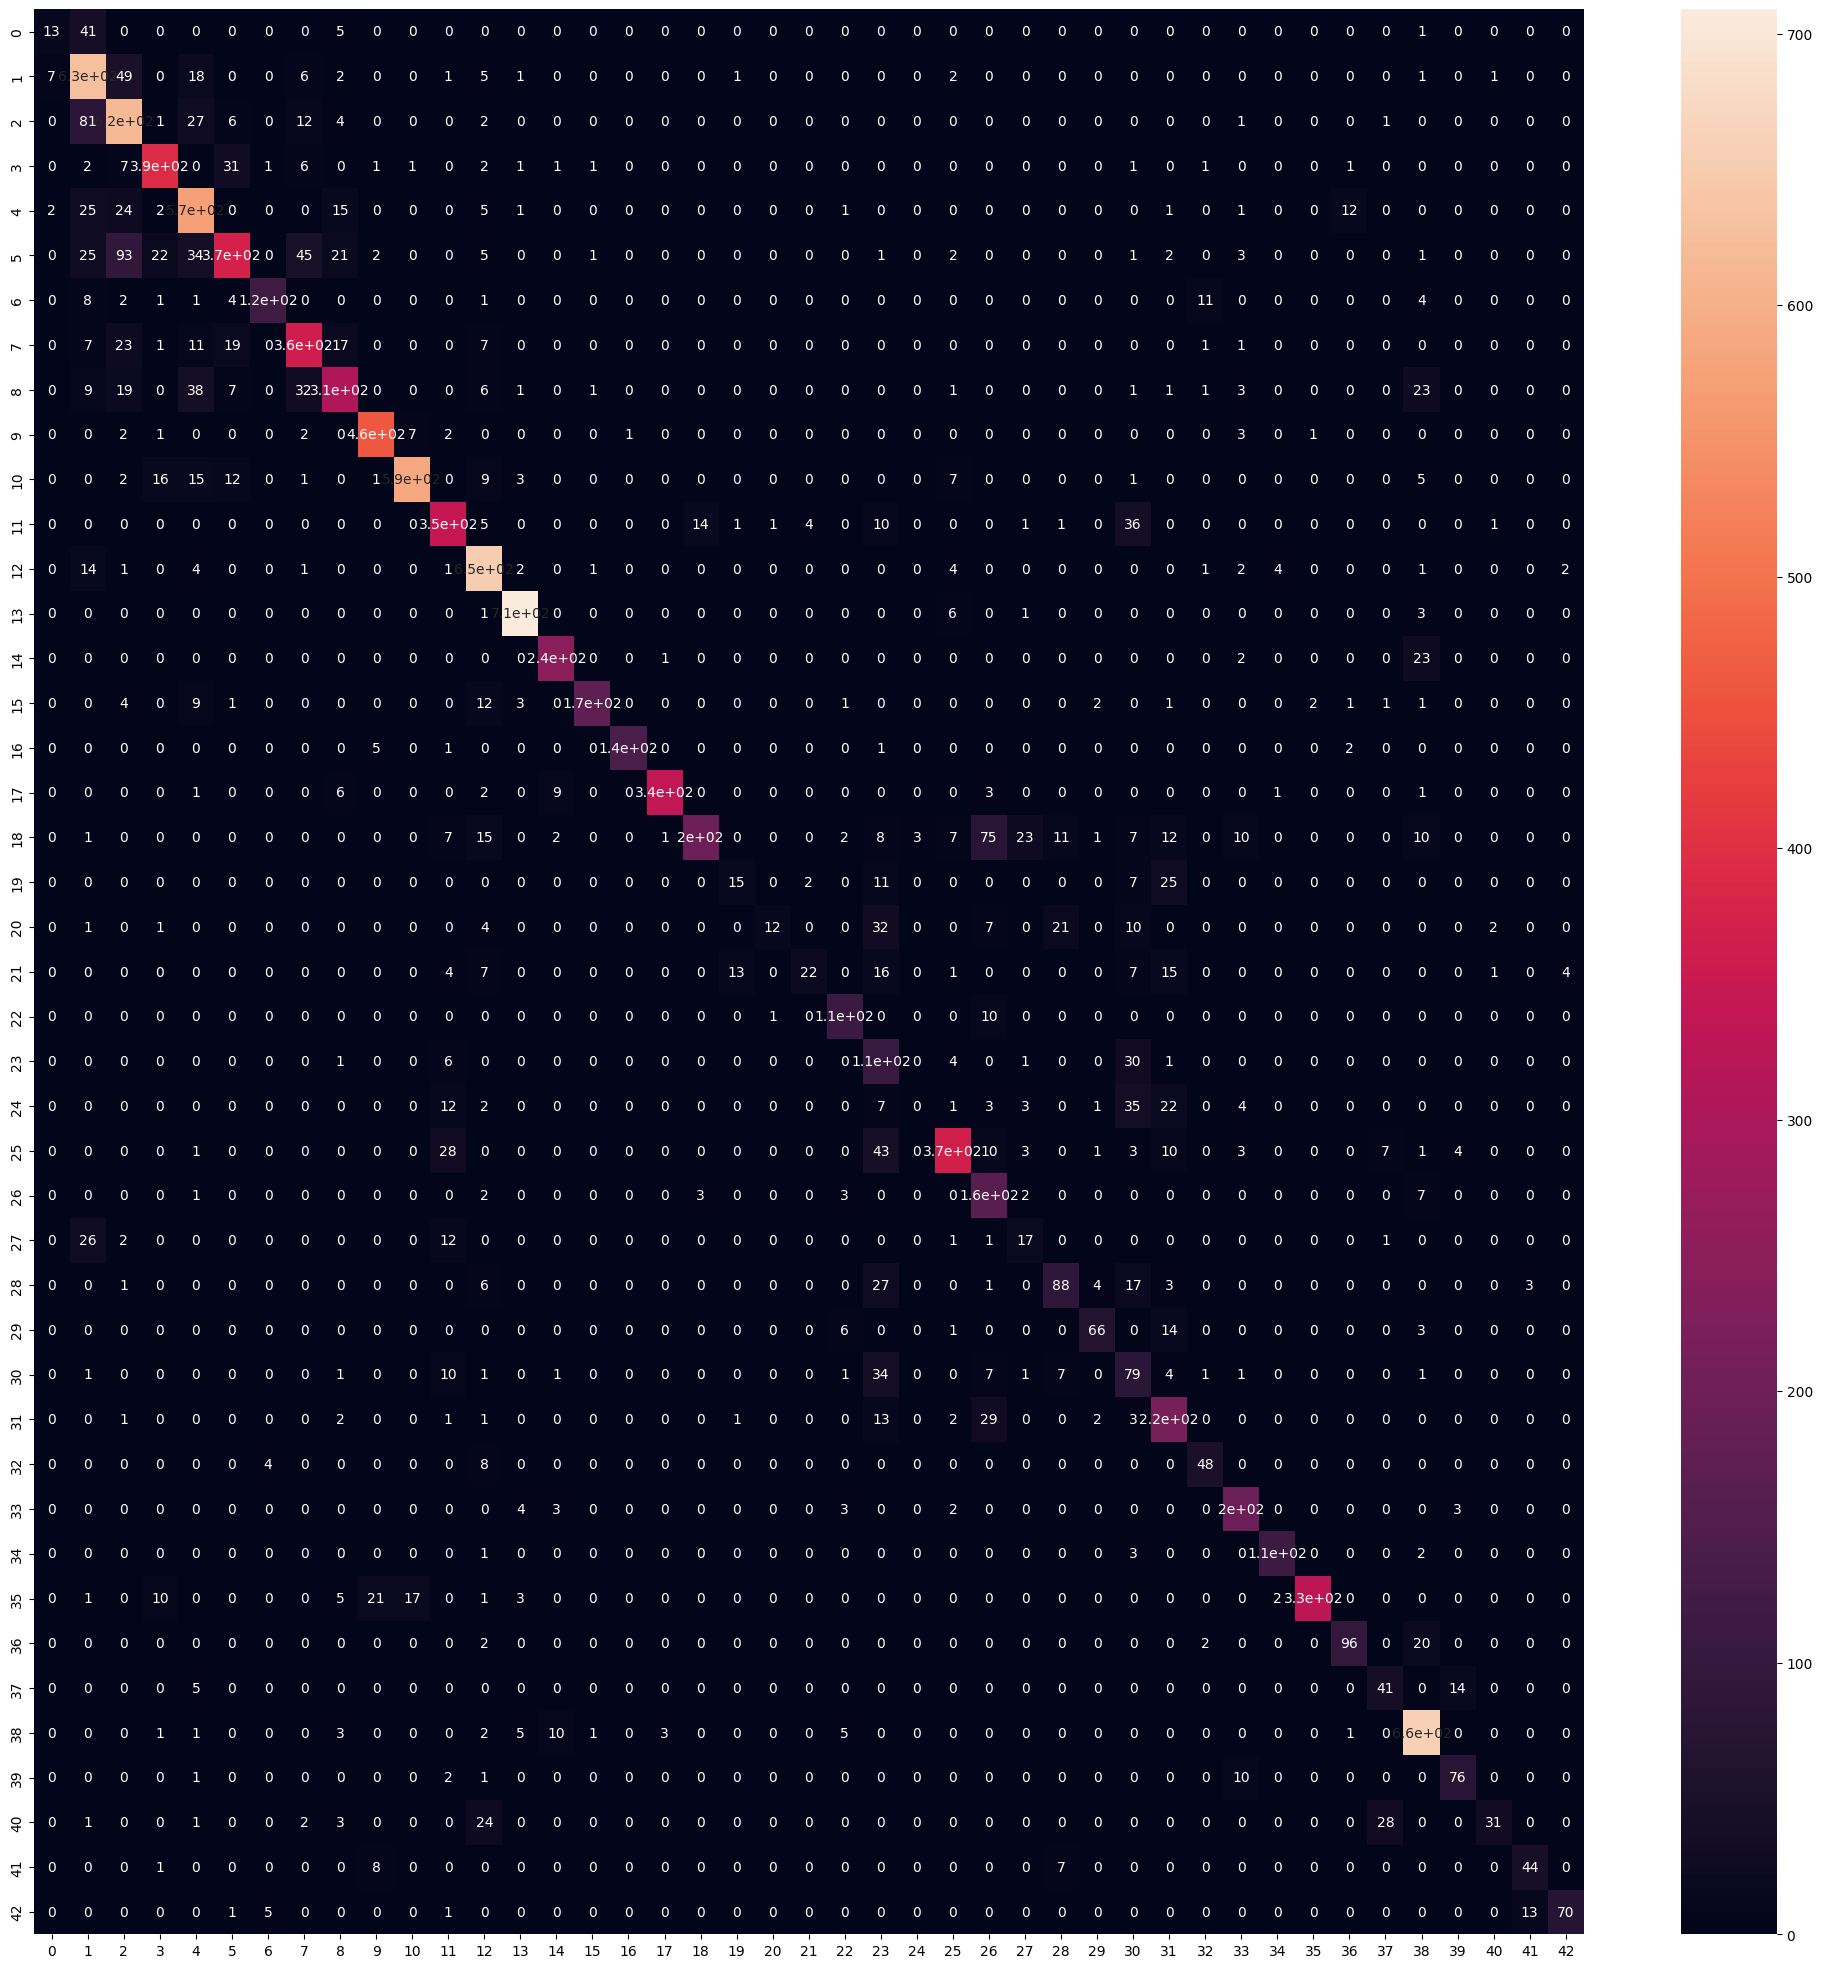

In [ ]:
predicted_classes=CNN.predict(X_test_gray_norm).argmax(axis=1)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)
plt.show()

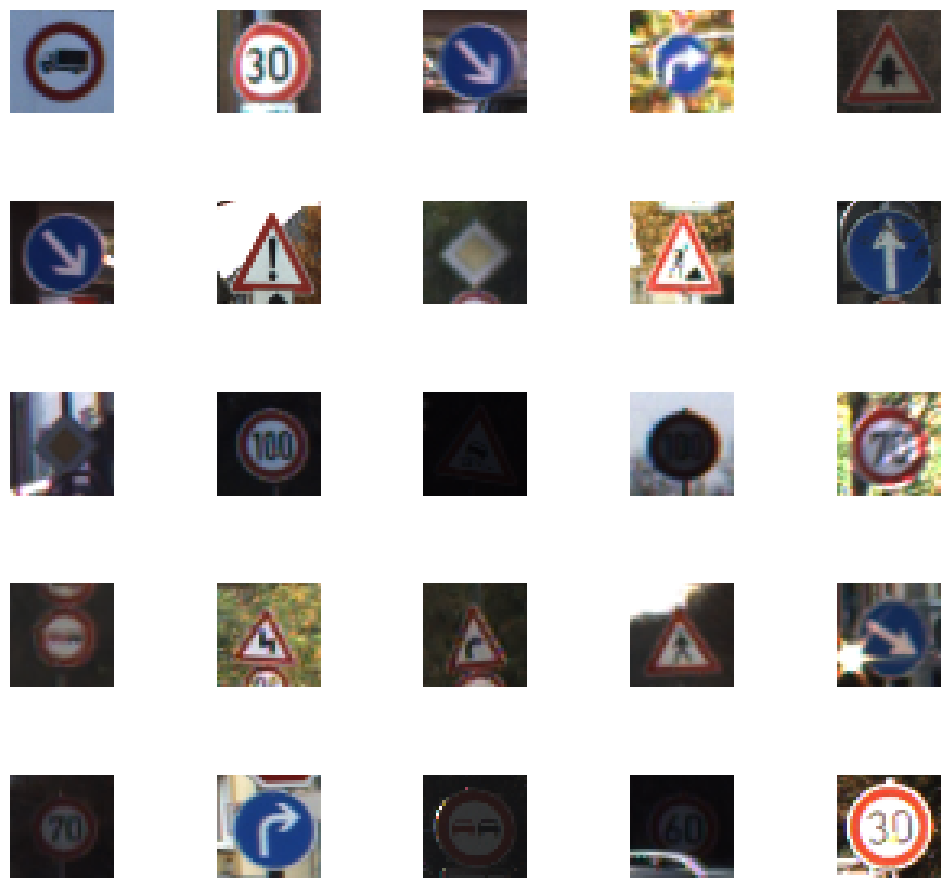

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)